In [ ]:
import json
import re
import pandas as pd
import urllib
from tqdm import tqdm
from urllib.request import Request
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://www.otodom.pl/pl/oferty/sprzedaz/mieszkanie/krakow?distanceRadius=0&locations=%5Bcities_6-38%5D&viewType=listing&page='

apartaments = []
for page_number in tqdm(range(1,300)):
    with urllib.request.urlopen(f'{url}{page_number}') as resp:
        page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        apartaments_html = page.find_all(attrs={'data-cy': 'listing-item'})
        
        for apartament_html in apartaments_html:
          apart_dto = {}
          apart_dto['name'] = apartament_html.find(attrs={'data-cy': 'listing-item-title'}).text
          more_info = apartament_html.find('div', 'e1n6ljqa19').select('span')
          if len(more_info) != 4:
            raise ValueError('exception to 4 additional info blocks')
          

          for info in more_info:
            info_type = info.findAll('strong')
            if len(info_type) > 0:
              data = re.sub(r'[\s]+', '', info.text.replace('zł/m²', ''))
              apart_dto['price_per_m2'] = float(data)
              continue
            info_strings = re.sub('\xa0', ' ', info.text).split(' ')
            if info_strings[-1] == 'zł':
              try:
                data = re.sub(r'[\s]+', '', info.text.replace('zł', ''))
                apart_dto['price'] = float(data)
              except ValueError:
                apart_dto['price'] = None
            elif info_strings[-1] == 'm²':
              try:
                data = re.sub(r'[\s]+', '', info.text.replace('m²', ''))
                apart_dto['area'] = float(info.text.replace(' ', '').replace('m²', ''))
              except ValueError:
                apart_dto['area'] = None
            elif re.match(r'pok', info_strings[-1]):
              try:
                apart_dto['rooms'] = int(info_strings[0])
              except ValueError:
                apart_dto['rooms'] = None

          apartaments.append(apart_dto)

100%|██████████| 299/299 [03:58<00:00,  1.26it/s]


In [ ]:
df = pd.DataFrame.from_dict(apartaments)
df.head(35)

,name,price,price_per_m2,rooms,area
0,OKAZJA! Bezpośrednio! Klucze na wakacje!,419000.0,11600.0,2,36.12
1,Mieszkanie inwestycyjne w Krakowie-2-pak kawal...,590000.0,11800.0,3,50.00
2,"Miechowity Po remoncie 3 pokoje 2 balkony 53,6",660000.0,12313.0,3,53.60
3,3 ustawne pokoje w nowym budynku! Wola Duchacka,679000.0,14447.0,3,47.00
4,"!Mieszkanie 4-pokojowe, WYSOKI STANDARD, garaż!",869000.0,12970.0,4,67.00
5,3 pokoje 63m² jasna kuchnia balkon 1p./4 tramwaj,579000.0,9190.0,3,63.00
6,Sprzedam mieszkanie po generalnym remoncie,450800.0,11500.0,2,39.20
7,Mieszkanie 2-pokojowe od właściciela - Nowa Huta,345000.0,9452.0,2,36.50
8,Lokal mieszkalny na Rynku Głównym w Krakowie,2860000.0,16913.0,4,169.10
9,3-pokojowe mieszkanie 61m2 + balkon Bezpośrednio,687000.0,11124.0,3,61.76


In [ ]:
df[df['price'].isna()].head(20)

,name,price,price_per_m2,rooms,area
63,Nowoczesne 3 pokoje_10 min do Rynku_Biuro Sprz...,NaN,NaN,3,53.03
64,Przytulne 3 pokoje_Biuro Sprzedaży_Spytaj o RABAT,NaN,NaN,3,56.90
65,Słoneczne M2_Biuro Sprzedaży_Wiosenna Promocja,NaN,NaN,2,38.84
87,3-pokojowe mieszkanie 54m2 + 2 balkony,NaN,NaN,3,54.29
88,2-pokojowe mieszkanie 37m2 + 2 balkony,NaN,NaN,2,37.26
89,2-pokojowe mieszkanie 35m2 + balkon Bezpośrednio,NaN,NaN,2,35.01
93,2-pokojowe mieszkanie 42m2 + balkon Bezpośrednio,NaN,NaN,2,42.16
94,4-pokojowe mieszkanie 82m2 + balkon Bezpośrednio,NaN,NaN,4,82.98
95,3-pokojowe mieszkanie 54m2 + 2 balkony,NaN,NaN,3,54.29
203,"Mieszkanie, Stare Podgórze, ul. Rękawka 32",NaN,NaN,3,54.84


(0.0, 40000.0)

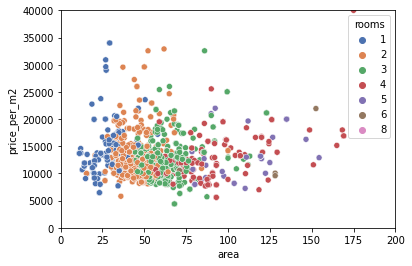

In [ ]:
sns.scatterplot(x='area', y='price_per_m2', data=df.dropna(subset=['price']), hue='rooms', palette="deep")
plt.xlim((0, 200))
plt.ylim((0, 40_000))

<Axes: xlabel='rooms', ylabel='count'>

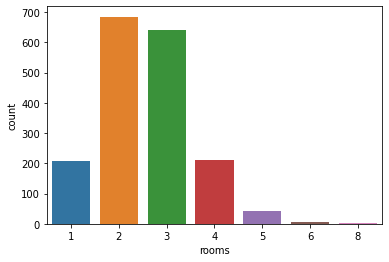

In [ ]:
sns.countplot(x=df["rooms"])